<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season


### Load Data From CSV File


Let's load the dataset \[NB Need to provide link to csv file]


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.


**Original IBM assignment had neglected to include 2nd and champions in the F4 class. Below we fix it**

In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')
#this is the correction
df_new= df.replace({'POSTSEASON':['2ND', 'Champions']}, {'POSTSEASON':['F4', 'F4']})
df_new.head(15)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,F4,1.0,2016,True
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,F4,2.0,2016,True
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False
7,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016,True
8,Davidson,A10,32,19,113.0,106.0,0.6767,52.0,52.0,14.2,...,51.1,52.2,35.5,34.3,71.3,-2.1,NaN,NaN,2016,False
9,Duquesne,A10,33,16,108.2,105.1,0.5851,53.9,49.4,18.9,...,53.1,42.8,36.6,40.2,73.6,-7.8,NaN,NaN,2016,False


# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [5]:
df1 = df_new.loc[df_new['POSTSEASON'].str.contains('F4|S16|E8', na=False)] # USE OR OPERATOR, na=False does not fill missing values
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,F4,1.0,2016,True
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,F4,2.0,2016,True
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
F4     16
E8     16
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.


Lets plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
!pip install seaborn
!pip install matplotlib==3.1.3
import seaborn as sns

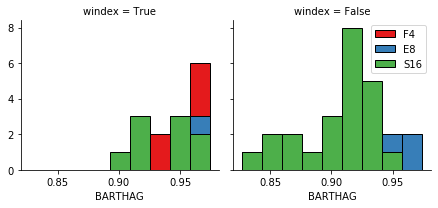

In [8]:


bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)    #create aray of numbers
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

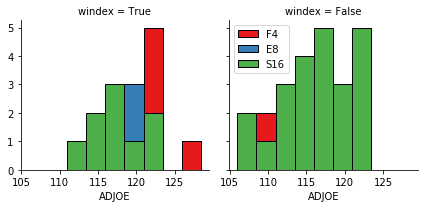

In [9]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

**Offensive efficiency seems to play a role**

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


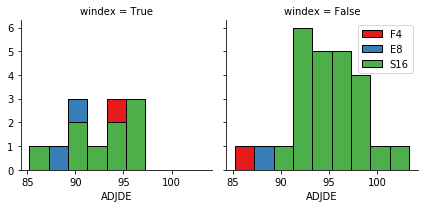

In [10]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four.


## Convert Categorical features to numerical values


Lets look at the postseason:


In [11]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.575
        E8            0.250
        F4            0.175
True    F4            0.375
        S16           0.375
        E8            0.250
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.
**correction: including 2nd and champions we see that windex play role, there is 37.5% with 6 or more wins vs 17.5%  with less than 6 wins
we will continue nevertheless classification with  all features of original project**


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [12]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/Users/macuser/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,F4,1.0,2016,1
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,F4,2.0,2016,1
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1


### Feature selection


Lets defind feature sets, X:


In [13]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,1
1,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,20.6,28.2,...,34.1,30.0,57.4,44.1,36.2,33.9,66.7,8.9,2.0,1
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [14]:
y = df1['POSTSEASON'].values
y[0:5]

array(['F4', 'F4', 'E8', 'E8', 'E8'], dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split )


In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 2.14084339,  1.200327  ,  1.27099005,  0.36932205,  0.76705911,
        -0.46974302,  0.30923174, -0.96858472, -0.30520594,  2.14127026,
         0.60713448, -0.57909905, -0.00976731,  0.28066701, -0.69049988,
        -1.58025802,  1.32656749,  1.0052157 ,  0.85148926, -1.03362279,
         1.29099445],
       [ 2.14084339,  1.75499074,  1.22685366, -0.75489252,  1.21828482,
         0.8229159 , -0.35046264, -0.37945611,  0.73195407, -0.99095905,
         0.37446019, -0.14250081, -0.09042637,  1.43848303, -0.895853  ,
        -0.23022829,  0.35892262, -0.65887651,  0.94743171, -0.7028635 ,
         1.29099445],
       [-0.58580292, -1.29565983,  0.16758035,  2.73017266, -2.54367836,
         0.04732055,  0.96892611, -1.03404346, -1.77451594,  0.1366435 ,
         1.4214945 , -0.4335663 , -0.89701696, -0.05013757,  0.08984199,
         0.23263905,  1.6210681 , -1.05825864, -1.16330223,  0.62017367,
        -0.77459667],
       [ 0.09585866,  0.09099952,  0.52067145, -0.72678716

## Training and Validation


Split the data into Training and Validation data.


In [16]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (51, 21) (51,)
Validation set: (13, 21) (13,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat=neigh.predict(X_val)
print("\033[1m Evaluation set Accuracy: ", accuracy_score(y_val, yhat), '\033[0m')

 Evaluation set Accuracy:  0.6153846153846154 


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k the on the validation data:


Evaluation set Accuracy for k= 1 is: 0.46153846153846156
Evaluation set Accuracy for k= 2 is: 0.5384615384615384
Evaluation set Accuracy for k= 3 is: 0.5384615384615384
Evaluation set Accuracy for k= 4 is: 0.38461538461538464
Evaluation set Accuracy for k= 5 is: 0.6153846153846154
Evaluation set Accuracy for k= 6 is: 0.5384615384615384
Evaluation set Accuracy for k= 7 is: 0.6923076923076923
Evaluation set Accuracy for k= 8 is: 0.46153846153846156
Evaluation set Accuracy for k= 9 is: 0.6153846153846154
Evaluation set Accuracy for k= 10 is: 0.6923076923076923
Evaluation set Accuracy for k= 11 is: 0.6923076923076923
Evaluation set Accuracy for k= 12 is: 0.5384615384615384
Evaluation set Accuracy for k= 13 is: 0.5384615384615384
Evaluation set Accuracy for k= 14 is: 0.5384615384615384
Evaluation set Accuracy for k= 15 is: 0.46153846153846156


,k,accuracy
0,1.0,0.461538
1,2.0,0.538462
2,3.0,0.538462
3,4.0,0.384615
4,5.0,0.615385
5,6.0,0.538462
6,7.0,0.692308
7,8.0,0.461538
8,9.0,0.615385
9,10.0,0.692308


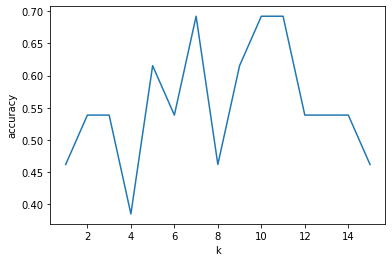

In [18]:
acc_df=pd.DataFrame(columns=['k', 'accuracy']) #optional: define dataframe for graphing
for k in range(15):
    neighk = KNeighborsClassifier(n_neighbors = k+1).fit(X_train,y_train)
    yhatk=neighk.predict(X_val)
    acc=accuracy_score(y_val, yhatk)
    print("Evaluation set Accuracy for k=", k+1, 'is:', acc )
    acc_df=acc_df.append({'k':k+1, 'accuracy': acc}, ignore_index = True)
display(acc_df)

#optional: graph below show the variation of accuracy vs k
sns.lineplot(data=acc_df, x='k', y='accuracy')


**KNN**: Based on Accuracy **k=6** is chosen for **KNN**

# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results


In [20]:
acc_tree_df=pd.DataFrame(columns=['max_depth','criterion', 'accuracy' ]) #define dataframe to store depth vs accuracy
for crit in ["entropy", 'gini']:
    for mxd in range(10):
        #set random_state to avoid tree-objects giving random results. Sample is small and we probably have overfitting 
        BBTree = DecisionTreeClassifier(criterion=crit, max_depth = mxd+1, random_state=0)
        BBTree.fit(X_train,y_train)
        yhat_tree=BBTree.predict(X_val)
        #yhat=BBTree.predict(X_train)
        
        acc_tree=accuracy_score(y_val, yhat_tree)
        print("DecisionTrees's Accuracy on val data for max depth",mxd+1,"and criterion", crit, "is:" ,acc_tree)
        acc_tree_df=acc_tree_df.append({'max_depth':mxd+1,'criterion': crit, 'accuracy': acc_tree}, ignore_index = True)
    
#method 1 to display top accuracy
acc_tree_df.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_tree_df.head())
#method 2 to display top accuracy 
display(acc_tree_df[acc_tree_df['accuracy']== acc_tree_df['accuracy'].max()])


DecisionTrees's Accuracy on val data for max depth 1 and criterion entropy is: 0.46153846153846156
DecisionTrees's Accuracy on val data for max depth 2 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 3 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 4 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 5 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 6 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 7 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 8 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 9 and criterion entropy is: 0.6153846153846154
DecisionTrees's Accuracy on val data for max depth 10 and criterion entropy is: 0.6153846153846154
DecisionTrees's Ac

,max_depth,criterion,accuracy
11,2,gini,0.615385
2,3,entropy,0.615385
3,4,entropy,0.615385
4,5,entropy,0.615385
5,6,entropy,0.615385


,max_depth,criterion,accuracy
11,2,gini,0.615385
2,3,entropy,0.615385
3,4,entropy,0.615385
4,5,entropy,0.615385
5,6,entropy,0.615385
6,7,entropy,0.615385
7,8,entropy,0.615385
8,9,entropy,0.615385
9,10,entropy,0.615385
1,2,entropy,0.615385


**Decision Tree**: Based on analysis for both criteria **entropy** and **gini**  the accuracy is max for **max depth =2. But for entropy method only all depths 2-10 give same accuracy**

# Support Vector Machine


<b>Question  4</b>Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [21]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix




In [22]:
# write your code here
#possible kernels: "linear", "rbm", "polynomial", "sigmoid"
#attn jaccard computed using sklearn uses a different jaccard index than course.(computes average over samples)
#in question 5 we will define the standard Jaccard for our purposes
kernels=["linear", "rbf", "poly", "sigmoid"]
acc_svm_df=pd.DataFrame(columns=['method', 'accuracy']) #define dataframe to store method vs accuracy

for iter, kernel in enumerate(kernels):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train) 
    yhat_svm = clf.predict(X_val)

    print(" \033[1m Analysis for", kernel, "method \033[0m \n")
    acc_svm=accuracy_score(y_val, yhat_svm)
    #store accuracy
    acc_svm_df=acc_svm_df.append({'method':kernel, 'accuracy': acc_svm}, ignore_index = True)

    print(" \033[1m Accuracy (what is being asked) %.4f" %acc_svm,'\033[0m \n' )
    #micro computes essentially f1 for micro averaged Precision and recall
    # this is an average where we take i.e essentially the accuracy (TP+TN)/(TP+TN+FP+FN)
    print("The f1 score with micro average is %.4f" %f1_score(y_val,yhat_svm, average='micro'), "\n")
    #agrees with accuracy
    print("The f1 score with weighted average is %.4f" %f1_score(y_val,yhat_svm, average='weighted'), "\n")
    print("Jaccard score for micro average : %.4f" % jaccard_score(y_val, yhat_svm,average='micro'), '\n')
    print("Jaccard score for weighted average : %.4f" % jaccard_score(y_val, yhat_svm,average='weighted'), '\n')
    
   
#method 1 to display top accuracy
print("Ranked in order of accuracy only \n")
acc_svm_df.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_svm_df.head())
print(" \033[1m method",acc_svm_df.iat[0,0], "scored max \033[0m")
display(acc_svm_df[acc_svm_df['accuracy']== acc_svm_df['accuracy'].max()])


  Analysis for linear method  

  Accuracy (what is being asked) 0.6154  

The f1 score with micro average is 0.6154 

The f1 score with weighted average is 0.6144 

Jaccard score for micro average : 0.4444 

Jaccard score for weighted average : 0.4500 

  Analysis for rbf method  

  Accuracy (what is being asked) 0.4615  

The f1 score with micro average is 0.4615 

The f1 score with weighted average is 0.4000 

Jaccard score for micro average : 0.3000 

Jaccard score for weighted average : 0.2704 

  Analysis for poly method  

  Accuracy (what is being asked) 0.5385  

The f1 score with micro average is 0.5385 

The f1 score with weighted average is 0.4308 

Jaccard score for micro average : 0.3684 

Jaccard score for weighted average : 0.3077 

  Analysis for sigmoid method  

  Accuracy (what is being asked) 0.4615  

The f1 score with micro average is 0.4615 

The f1 score with weighted average is 0.4652 

Jaccard score for micro average : 0.3000 

Jaccard score for weighted ave

,method,accuracy
0,linear,0.615385
2,poly,0.538462
1,rbf,0.461538
3,sigmoid,0.461538


  method linear scored max 


,method,accuracy
0,linear,0.615385


**Support Vector machines**:Based on accuracy only  kernel **linear** is best. Also is micro-average Jaccard score is the best

# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [24]:
#possible solvers: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers
solvers=["newton-cg", "lbfgs", "liblinear", "sag", "saga" ]
acc_lr_df=pd.DataFrame(columns=['solver', 'accuracy', 'log-loss']) 
#define dataframe to store method vs accuracy, logloss

for iter, solver in enumerate(solvers):
    LR=LogisticRegression(C=0.01, solver=solver, random_state=0)
    LR.fit(X_train,y_train)
    yhat_lr = LR.predict(X_val)
    yhat_prob = LR.predict_proba(X_val)
    logloss=log_loss(y_val, yhat_prob)
    acc_lr=accuracy_score(y_val, yhat_lr)
    
    print(" \033[1m Analysis for", solver , "method \033[0m \n")
    #store accuracy and log-loss
    acc_lr_df=acc_lr_df.append({'solver':solver, 'accuracy': acc_lr, 'log-loss':logloss}, ignore_index = True)
    
    print(" \033[1m Accuracy (what is being asked) %.4f" %acc_lr,'\033[0m \n' )
    #micro computes essentially f1 for micro averaged Precision and recall
    # this is an average where we take i.e essentially the accuracy (TP+TN)/(TP+TN+FP+FN)
    print("The f1 score with micro average is %.4f" %f1_score(y_val,yhat_lr, average='micro'), "\n")
    #agrees with accuracy
    print("The f1 score with weighted average is %.4f" %f1_score(y_val,yhat_lr, average='weighted'), "\n")
    print("Jaccard score for micro average : %.4f" % jaccard_score(y_val, yhat_lr,average='micro'), '\n')
    print("Jaccard score for weighted average : %.4f" % jaccard_score(y_val, yhat_lr,average='weighted'), '\n')
    print("Log-loss: %.4f" %log_loss(y_val, yhat_prob), "\n")

        
# display top accuracy
print("\n \033[1m Ranked in order of descending accuracy \033[0m \n")
acc_lr_df.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_lr_df.head())
print("\n \033[1m Solvers with max  accuracy '\033[0m \n'", acc_lr_df[acc_lr_df['accuracy']== acc_lr_df['accuracy'].max()],'\n')

#display min log loss
print("\n \033[1m Ranked in order of ascending log-loss \033[0m \n")
acc_lr_df.sort_values(by='log-loss', ascending=True, inplace=True)
display(acc_lr_df.head())
print(" \033[1m Solver ",acc_lr_df.iat[0,0], " scored min log loss \033[0m")


    
    
    
    





  Analysis for newton-cg method  

  Accuracy (what is being asked) 0.5385  

The f1 score with micro average is 0.5385 

The f1 score with weighted average is 0.4308 

Jaccard score for micro average : 0.3684 

Jaccard score for weighted average : 0.3077 

Log-loss: 1.0262 

  Analysis for lbfgs method  

  Accuracy (what is being asked) 0.5385  

The f1 score with micro average is 0.5385 

The f1 score with weighted average is 0.4308 

Jaccard score for micro average : 0.3684 

Jaccard score for weighted average : 0.3077 

Log-loss: 1.0262 

  Analysis for liblinear method  

  Accuracy (what is being asked) 0.4615  

The f1 score with micro average is 0.4615 

The f1 score with weighted average is 0.4056 

Jaccard score for micro average : 0.3000 

Jaccard score for weighted average : 0.2756 

Log-loss: 1.0744 

  Analysis for sag method  

  Accuracy (what is being asked) 0.5385  

The f1 score with micro average is 0.5385 

The f1 score with weighted average is 0.4308 

Jaccard sc

,solver,accuracy,log-loss
0,newton-cg,0.538462,1.026228
1,lbfgs,0.538462,1.026228
3,sag,0.538462,1.026231
4,saga,0.538462,1.026224
2,liblinear,0.461538,1.074442



  Solvers with max  accuracy ' 
'       solver  accuracy  log-loss
0  newton-cg  0.538462  1.026228
1      lbfgs  0.538462  1.026228
3        sag  0.538462  1.026231
4       saga  0.538462  1.026224 


  Ranked in order of ascending log-loss  



,solver,accuracy,log-loss
4,saga,0.538462,1.026224
1,lbfgs,0.538462,1.026228
0,newton-cg,0.538462,1.026228
3,sag,0.538462,1.026231
2,liblinear,0.461538,1.074442


  Solver  saga  scored min log loss 


**Logistic Regression**: Based on the analysis all solvers had the same accuracy, Jaccard/F1-micro. So we cannot disciminate. Log loss gives advantage to **saga** method. 

# Model Evaluation using Test set


In [25]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [26]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1\_score please set the average parameter to 'micro'.**


### Load Test set for evaluation


In [27]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
print(test_df.shape)
test_df.head()

(1757, 24)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [28]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df_new= test_df.replace({'POSTSEASON':['2ND', 'Champions']}, {'POSTSEASON':['F4', 'F4']})
test_df1 = test_df_new[test_df_new['POSTSEASON'].str.contains('F4|S16|E8', na=False)]

test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
print(test_X.shape)
test_X[0:5]

(80, 21)


/Users/macuser/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([[ 2.0237774 ,  1.08826557,  1.22530098,  0.44981368,  0.71518965,
        -0.33173773,  0.40209949, -0.92761522, -0.29964277,  2.05898704,
         0.56525459, -0.71716081, -0.11377348,  0.36075891, -0.49090361,
        -1.52502989,  1.32113889,  1.1464997 ,  0.81747836, -1.06609823,
         1.29099445],
       [ 2.0237774 ,  1.59150976,  1.18321249, -0.63489151,  1.16064546,
         0.85911567, -0.18506013, -0.34431133,  0.67381598, -1.1096603 ,
         0.33629071, -0.29956616, -0.18405826,  1.44808393, -0.6782714 ,
        -0.18223628,  0.37231158, -0.38727916,  0.90945905, -0.73031926,
         1.29099445],
       [-0.56665767, -1.1763333 ,  0.17308889,  2.72769459, -2.55321282,
         0.14460363,  0.9892591 , -0.99242677, -1.67870933,  0.03105274,
         1.36662819, -0.5779626 , -0.88690601,  0.05009462,  0.22109399,
         0.27815011,  1.60991241, -0.75538609, -1.11411608,  0.61279662,
        -0.77459667],
       [ 0.0809511 ,  0.08177718,  0.50979676, -0.60777388

In [29]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['F4', 'F4', 'E8', 'E8', 'E8'], dtype=object)

KNN


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k = 6
neigh_knn_test_6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn_test_6=neigh_knn_test_6.predict(test_X)

print( "\033[1m KNN:  we use k=6 as found with evaluation set \033[0m")
print("Test set Accuracy for k= ",k,":", accuracy_score(test_y, yhat_knn_test_6))
print("Test set Jaccard for k=  ",k,":", jaccard_index(yhat_knn_test_6, test_y))
print("Test set F1 for k= ",k,":", f1_score(test_y, yhat_knn_test_6, average='micro'))

 KNN:  we use k=6 as found with evaluation set 
Test set Accuracy for k=  6 : 0.6125
Test set Jaccard for k=   6 : 0.44144144144144143
Test set F1 for k=  6 : 0.6125


In [31]:
#THIS IS EXTRA: for verification purposes we run also k=1-15

acc_df_knn_test=pd.DataFrame(columns=['k', 'accuracy', 'jaccard', 'f1_micro']) 

for k in range(15):
    neigh_knn_test = KNeighborsClassifier(n_neighbors = k+1).fit(X_train,y_train)
    yhat_knn_test=neigh_knn_test.predict(test_X)
    
    acc_knn_test=accuracy_score(test_y, yhat_knn_test)
    jac_knn_test= jaccard_index(yhat_knn_test, test_y)
    f1_knn_test=f1_score(test_y, yhat_knn_test, average='micro')

    acc_df_knn_test=acc_df_knn_test.append({'k':k+1, 'accuracy': acc_knn_test, 'jaccard': jac_knn_test, \
                                            'f1_micro': f1_knn_test}, ignore_index = True)


acc_df_knn_test.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_df_knn_test.head())

acc_df_knn_test.sort_values(by='jaccard', ascending=False, inplace=True)
display(acc_df_knn_test.head())

acc_df_knn_test.sort_values(by='f1_micro', ascending=False, inplace=True)
display(acc_df_knn_test.head())



,k,accuracy,jaccard,f1_micro
0,1.0,0.8250,0.702128,0.8250
2,3.0,0.6875,0.523810,0.6875
3,4.0,0.6625,0.495327,0.6625
4,5.0,0.6500,0.481481,0.6500
1,2.0,0.6375,0.467890,0.6375


,k,accuracy,jaccard,f1_micro
0,1.0,0.8250,0.702128,0.8250
2,3.0,0.6875,0.523810,0.6875
3,4.0,0.6625,0.495327,0.6625
4,5.0,0.6500,0.481481,0.6500
1,2.0,0.6375,0.467890,0.6375


,k,accuracy,jaccard,f1_micro
0,1.0,0.8250,0.702128,0.8250
2,3.0,0.6875,0.523810,0.6875
3,4.0,0.6625,0.495327,0.6625
4,5.0,0.6500,0.481481,0.6500
1,2.0,0.6375,0.467890,0.6375


**KNN-Conclusions** For k=1 we get best values, but given that low k are prone to overfitting, we should try to train on a grid-search and re run for the test set to see what is going on. **k=3 is clearly the best of the rest. Our k=6 from the trained model did well but not as much** 

Decision Tree


In [32]:
print("for the trained set we had max depth 2 as the best. Lets use those\n")

    
BBTree_test2 = DecisionTreeClassifier(criterion="entropy", max_depth = 2, random_state=0)
BBTree_test2.fit(X_train,y_train)
yhat_tree_test2=BBTree_test2.predict(test_X)
    
print( "\033[1m we use max depth=2 as found with evaluation set \033[0m")
print(" Accuracy for maxdepth=2",accuracy_score(test_y, yhat_tree_test2))
print("Jaccard for maxdepth=2",jaccard_index(yhat_tree_test2, test_y))
print("F1 for maxdepth =2", f1_score(test_y, yhat_tree_test2,average='micro'))
    
    

for the trained set we had max depth 2 as the best. Lets use those

 we use max depth=2 as found with evaluation set 
 Accuracy for maxdepth=2 0.75
Jaccard for maxdepth=2 0.6
F1 for maxdepth =2 0.75


In [33]:
#THIS IS EXTRA: for verification purposes
acc_df_tree_test=pd.DataFrame(columns=['maxdepth', 'accuracy','jaccard', 'f1_micro']) #define dataframe to store 

for mxd in range(10):
    BBTree_test = DecisionTreeClassifier(criterion="entropy", max_depth = mxd+1, random_state=0)
    BBTree_test.fit(X_train,y_train)
    yhat_tree_test=BBTree_test.predict(test_X)
    
    acc_tree_test=accuracy_score(test_y, yhat_tree_test)
    jac_tree_test= jaccard_index(yhat_tree_test, test_y)
    f1_tree_test=f1_score(test_y, yhat_tree_test, average='micro')

    acc_df_tree_test=acc_df_tree_test.append({'maxdepth': mxd+1, 'accuracy': acc_tree_test, 'jaccard': jac_tree_test, \
                                            'f1_micro': f1_tree_test}, ignore_index = True)


acc_df_tree_test.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_df_tree_test.head(15))

acc_df_tree_test.sort_values(by='jaccard', ascending=False, inplace=True)
display(acc_df_tree_test.head(15))

acc_df_tree_test.sort_values(by='f1_micro', ascending=False, inplace=True)
display(acc_df_tree_test.head(15))


,maxdepth,accuracy,jaccard,f1_micro
5,6.0,0.8125,0.684211,0.8125
4,5.0,0.8000,0.666667,0.8000
6,7.0,0.8000,0.666667,0.8000
7,8.0,0.7875,0.649485,0.7875
8,9.0,0.7875,0.649485,0.7875
9,10.0,0.7875,0.649485,0.7875
3,4.0,0.7625,0.616162,0.7625
1,2.0,0.7500,0.600000,0.7500
2,3.0,0.7500,0.600000,0.7500
0,1.0,0.6625,0.495327,0.6625


,maxdepth,accuracy,jaccard,f1_micro
5,6.0,0.8125,0.684211,0.8125
4,5.0,0.8000,0.666667,0.8000
6,7.0,0.8000,0.666667,0.8000
7,8.0,0.7875,0.649485,0.7875
8,9.0,0.7875,0.649485,0.7875
9,10.0,0.7875,0.649485,0.7875
3,4.0,0.7625,0.616162,0.7625
1,2.0,0.7500,0.600000,0.7500
2,3.0,0.7500,0.600000,0.7500
0,1.0,0.6625,0.495327,0.6625


,maxdepth,accuracy,jaccard,f1_micro
5,6.0,0.8125,0.684211,0.8125
4,5.0,0.8000,0.666667,0.8000
6,7.0,0.8000,0.666667,0.8000
7,8.0,0.7875,0.649485,0.7875
8,9.0,0.7875,0.649485,0.7875
9,10.0,0.7875,0.649485,0.7875
3,4.0,0.7625,0.616162,0.7625
1,2.0,0.7500,0.600000,0.7500
2,3.0,0.7500,0.600000,0.7500
0,1.0,0.6625,0.495327,0.6625


**Decision-Tree Conclusion**: Although maxdepth 2 gave best results for training-evaluation and gini, for all depths 2-10 we had the same accuracy for entropy. This was already a bit suspicious as depth 2 was low for this number of features. For the test max depth 6,5,7 do a better job. But the point of training and evaluating is to use is for prediction on a test. The test set cannot be used as is for deciding to use max depth 6,5 7 over initial  2. One should go back and retrain the model probably with a Grid search on the original train,evaluation data and then check again with the test. 

Max depth 2 gave good results in general though, pretty close to the rest. Jaccard results are approx 8% less and accuracy 6% less

SVM


In [34]:
print("for the trained set we had linear method as the best. Lets use this\n")
clf_test_lin = svm.SVC(kernel='linear')
clf_test_lin.fit(X_train, y_train) 
yhat_svm_test_lin = clf_test_poly.predict(test_X)
    
print( "\033[1m we use method linear as found with evaluation set \033[0m")
print(" Accuracy ",accuracy_score(test_y, yhat_svm_test_lin))
print("Jaccard",jaccard_index(yhat_svm_test_lin, test_y))
print("F1", f1_score(test_y, yhat_svm_test_lin, average='micro'))

for the trained set we had linear method as the best. Lets use this



NameError: name 'clf_test_poly' is not defined

In [ ]:
#THIS IS EXTRA: for verification purposes

kernels=["linear", "rbf", "poly", "sigmoid"]
acc_df_svm_test=pd.DataFrame(columns=['kernel', 'accuracy','jaccard', 'f1_micro'])

for iter, kernel in enumerate(kernels):
    clf_test = svm.SVC(kernel=kernel)
    clf_test.fit(X_train, y_train) 
    yhat_svm_test = clf_test.predict(test_X)
    
    acc_svm_test=accuracy_score(test_y, yhat_svm_test)
    jac_svm_test= jaccard_index(yhat_svm_test, test_y)
    f1_svm_test=f1_score(test_y, yhat_svm_test,average='micro')

    acc_df_svm_test=acc_df_svm_test.append({'kernel': kernel, 'accuracy': acc_svm_test, 'jaccard': jac_svm_test, \
                                            'f1_micro': f1_svm_test}, ignore_index = True)


acc_df_svm_test.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_df_svm_test.head(15))

acc_df_svm_test.sort_values(by='jaccard', ascending=False, inplace=True)
display(acc_df_svm_test.head())

acc_df_svm_test.sort_values(by='f1_micro', ascending=False, inplace=True)
display(acc_df_svm_test.head())

    


**SVM Conclusion**: Again  linear, is the best

Logistic Regression


In [ ]:
print("For training the saga solver gave the best result\n")
LR_test_saga=LogisticRegression(C=0.01, solver='saga')
LR_test_saga.fit(X_train,y_train)
yhat_lr_test_saga = LR_test_saga.predict(test_X)
yhat_prob_test_saga = LR_test_saga.predict_proba(test_X)
    
    
print( "\033[1m we use solver saga as found with evaluation set \033[0m")
print(" Accuracy ",accuracy_score(test_y, yhat_lr_test_saga))
print("Jaccard",jaccard_index(yhat_lr_test_saga, test_y))
print("F1", f1_score(test_y, yhat_lr_test_saga, average='micro'))
print("Log-loss", log_loss(test_y, yhat_prob_test_saga))

In [ ]:
#THIS IS EXTRA: for verification purposes

#check test set based on all solvers
solvers=["newton-cg", "lbfgs", "liblinear", "sag", "saga" ]
acc_df_lr_test=pd.DataFrame(columns=['solver', 'accuracy', 'jaccard', 'f1_micro','log-loss']) 

for iter, solver in enumerate(solvers):
    LR_test=LogisticRegression(C=0.01, solver=solver, random_state=0)
    LR_test.fit(X_train,y_train)
    yhat_lr_test = LR_test.predict(test_X)
    yhat_prob_test = LR_test.predict_proba(test_X)
    
    logloss=log_loss(test_y, yhat_prob_test)
    acc_lr_test=accuracy_score(test_y, yhat_lr_test)
    jac_lr_test= jaccard_index(yhat_lr_test, test_y)
    f1_lr_test=f1_score(test_y, yhat_lr_test, average='micro')

    acc_df_lr_test=acc_df_lr_test.append({'solver': solver, 'accuracy': acc_lr_test, 'jaccard': jac_lr_test, \
                                            'f1_micro': f1_lr_test, 'log-loss':logloss}, ignore_index = True)


acc_df_lr_test.sort_values(by='accuracy', ascending=False, inplace=True)
display(acc_df_lr_test.head())

acc_df_lr_test.sort_values(by='jaccard', ascending=False, inplace=True)
display(acc_df_lr_test.head())

acc_df_lr_test.sort_values(by='f1_micro', ascending=False, inplace=True)
display(acc_df_lr_test.head())

acc_df_lr_test.sort_values(by='log-loss', ascending=True, inplace=True)
display(acc_df_lr_test.head())

    

**Logistic Regression**: Liblinear scored max on accuracy, Jaccard and F1. Saga did the second best in all scores (same as the rest of the methods)
But saga did clearly better than liblinear in logloss. Original choice of Saga was based on tie with liblinear and all other solvers in the training set, but clear advantage in log-loss. Here we see that liblinear seems to outperform all solvers in accuracy, but still ranks last in logloss

Given that accuracy of saga is still good (>55%) and logloss minimum, saga seems good for test data

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN  (k=6)         | 0.6125   | 0.441441 | 0.6125    | NA      |
| Decision Tree(dp=2)| 0.750000 | 0.600000 | 0.750000  | NA      |
| SVM   (linear)     | 0.787500 | 0.649484 | 0.787500  | NA      |
| LogisticRegression | 0.612500 | 0.441441 | 0.612500  |0.897210 |
saga

Best performers on given test



| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN  (k=3)         | 0.687500 | 0.523881 | 0.687500  | NA      |
| Decision Tree(dp=6)| 0.812500 | 0.684211 | 0.812500  | NA      |
| SVM   (linear)     | 0.787500 | 0.649484 | 0.787500  | NA      |
| LogisticRegression | 0.637500 | 0.467889 | 0.637500  |0.999444 |
liblinear

**Summary**

**KNN-Conclusions** For k=1 we get best values, but given that low k are prone to overfitting, we should try to train on a grid-search and re run for the test set to see what is going on. **k=3 is clearly the best of the rest. Our k=6 from the trained model did well but not as much** 

**Decision-Tree Conclusion**: Although maxdepth 2 gave best results for training-evaluation and gini, for all depths 2-10 we had the same accuracy for entropy. This was already a bit suspicious as depth 2 was low for this number of features. For the test max depth 6,5,7 do a better job. But the point of training and evaluating is to use is for prediction on a test. The test set cannot be used as is for deciding to use max depth 6,5 7 over initial  2. One should go back and retrain the model probably with a Grid search on the original train,evaluation data and then check again with the test. 

Max depth 2 gave good results in general though, pretty close to the rest. Jaccard results are approx 8% less and accuracy 6% less

**SVM Conclusion**: Again  linear, is the best

**Logistic Regression**: Liblinear scored max on accuracy, Jaccard and F1. Saga did the second best in all scores (same as the rest of the methods)
But saga did clearly better than liblinear in logloss. Original choice of Saga was based on tie with liblinear and all other solvers in the training set, but clear advantage in log-loss. Here we see that liblinear seems to outperform all solvers in accuracy, but still ranks last in logloss

Given that accuracy of saga is still good (>55%) and logloss minimum, saga seems good for test data

Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2021-04-03   | 2.1  | Malika Singla| Updated the Report accuracy |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
